# Final Analysis March 16
1. For fig2C, I need the weights of feature ranking to classify age without Klotho (i.e. without ch4 and ch11). 
2. For fig2D, rug plot for CD63. Also the mean and variance
3. For fig2E, rug plot for cd81. Also the mean and variance
4. For fig3G, rug plot for Klotho. In this case, add intensity (your values) columns for alt-kl (ch4) and klotho (ch11) and then plot them. Also send me the mean and variance. 
5. For fig3I, linear regression based weights for prediction of klotho. Can you send me two sets of analysis here: prediction of only ch11 and prediction of ch4+ch11 
6. For fig3J, Correlation between cd82 and klotho. I can make this with the sheet you had sent me. 
7. For fig3K, the heat map like thing that you suggested where the rows are all features and columns are age and Klotho. I need numbers (weights?) to work with. 

I think for most analysis, let's consider Klotho intensity to be a sum of alt-kl (ch4) and klotho (ch11). 

In [54]:
% reload_ext autoreload
% autoreload 2
import pandas as pd
from BioAnalysis import BioAnalysis
import numpy as np
from tqdm import tqdm, trange
import sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import operator 
from collections import OrderedDict
from sklearn.linear_model import RANSACRegressor
from sklearn import preprocessing
from scipy.stats import fisher_exact
from IPython.display import HTML, display
import csv
import sys
# !{sys.executable} -m pip install seaborn
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
# db = pd.read_csv('../Amrita_29feb/features.csv')
# analysis = BioAnalysis('../Amrita_29feb/')
# points = analysis.points

# columns = list(db.columns)
# db['Index'] = db.Class*10000 + db['Object Number']
# db.set_index('Index')
# filtered = analysis.getFilteredIndices()
# indices = filtered[:,0]*10000 + filtered[:,1]
# indices = [int(index) for index in indices]
# filtered_db = db.loc[indices,:]
# filtered_db.Intensity_MC_Ch02 = points[:,0]
# filtered_db.Intensity_MC_Ch07 = points[:,1]
# filtered_db.Intensity_MC_Ch11 = points[:,2]
# try:
#     filtered_db.Intensity_MC_Ch04 = points[:,3]
# except:
#     pass
# filtered_db['Intensity_MC_KL'] = filtered_db.Intensity_MC_Ch04 + filtered_db.Intensity_MC_Ch11
db = pd.read_csv('../Amrita_29feb/features.csv')
# lets subtract the bgmean from the intensity

columns = list(db.columns)

# intensities = [s for s in columns if "Intensity_MC" in s]
# bkgds = [s for s in columns if "Bkgd" in s]

# for a,b in zip(intensities, bkgds):  
#     db[a] = db[a] - db[b]
    
analysis = BioAnalysis('../Amrita_29feb/')
points = analysis.points


filtered = analysis.getFilteredIndices()

filtered_db = pd.DataFrame(columns=db.columns)
for idx,row in enumerate(tqdm(filtered)):
    filtered_db = filtered_db.append(db[(db.Class == int(row[0])) & (db["Object Number"]==int(row[1]))])
    filtered_db.iloc[-1, filtered_db.columns.get_loc('Intensity_MC_Ch02')] = points[idx, 0]
    filtered_db.iloc[-1, filtered_db.columns.get_loc('Intensity_MC_Ch07')] = points[idx, 1]
    filtered_db.iloc[-1, filtered_db.columns.get_loc('Intensity_MC_Ch11')] = points[idx, 2]
    try:
        filtered_db.iloc[-1, filtered_db.columns.get_loc('Intensity_MC_Ch04')] = points[idx, 3]
    except:
        pass

In [39]:
filtered_db['Intensity_MC_KL'] = filtered_db.Intensity_MC_Ch04 + filtered_db.Intensity_MC_Ch11
unfiltered_db = filtered_db

In [40]:
data = []
data.append('Class')
data.append('Object Number')
data.append('Area_M01')
data.append('Area_M03')
data.append('Area_M04')
data.append('Area_M06')
data.append('Area_M07')
data.append('Area_M09')
# data.append('Area_M02')
# data.append('Area_M11')
data.append('Aspect Ratio_M01')
data.append('Aspect Ratio_M06')
data.append('Aspect Ratio_M09')
data.append('Modulation_M02_Ch02')
data.append('Modulation_M03_Ch03')
data.append('Modulation_M07_Ch07')
# data.append('Modulation_M04_Ch04')
# data.append('Modulation_M11_Ch11')
data.append('Intensity_MC_Ch02')
data.append('Intensity_MC_Ch07')
# data.append('Intensity_MC_Ch03')
# data.append('Intensity_MC_Ch04')
# data.append('Intensity_MC_Ch11')
data
filtered_db = unfiltered_db[data]
#     if idx%100==0:
#         sys.stdout.write(str(idx) + '\r')
#         sys.stdout.flush()
# print([column for column in filtered_db.columns])

,Class,Object Number,Area_M01,Area_M03,Area_M04,Area_M06,Area_M07,Area_M09,Aspect Ratio_M01,Aspect Ratio_M06,Aspect Ratio_M09,Modulation_M02_Ch02,Modulation_M03_Ch03,Modulation_M07_Ch07,Intensity_MC_Ch02,Intensity_MC_Ch07
0,0,0,9.111111,11.444444,7.777778,12.777778,6.888889,9.000000,0.820872,0.527867,0.917021,-1.100005,-1.494634,0.838120,8.75725,0.85150
1,0,1,9.000000,11.111111,0.000000,2.888889,4.000000,8.777778,0.721049,0.708838,0.729436,0.951244,0.937977,-1.288660,31.73825,0.03025
2,0,2,8.777778,12.333333,6.222222,11.222222,7.111111,8.222222,0.896562,0.615721,0.837751,-1.126466,-2.055105,0.789474,78.58675,0.64550
3,0,3,9.444444,1.666667,4.888889,9.333333,6.666667,7.888889,0.844097,0.623410,0.942560,-1.679328,0.892405,0.648485,3.45900,0.50400
4,0,4,6.444444,1.777778,5.666667,10.333333,5.888889,5.888889,0.804291,0.502729,0.817870,-1.251500,0.870104,0.725118,4.69200,0.34175
5,0,5,14.222222,14.111111,2.000000,1.666667,1.000000,8.777778,0.793562,0.577350,0.870013,0.689207,0.561760,0.111111,19.23100,5.20450
6,0,6,19.000000,6.777778,8.555556,9.777778,13.111111,16.222222,0.853788,0.866637,0.935702,-3.746349,1.175322,0.653846,4.17175,1.00400
7,0,7,9.888889,13.555556,5.666667,9.222222,8.111111,7.777778,0.873543,0.486851,0.968758,-1.177205,-3.483051,0.760684,8.17850,0.67750
10,0,10,13.444444,6.777778,5.000000,7.222222,10.444444,8.555556,0.810208,0.877909,0.561373,-6.923611,0.968240,0.454545,5.49750,0.54475
11,0,11,7.000000,8.777778,8.000000,8.111111,7.111111,7.000000,0.934098,0.501729,0.883696,-1.045591,-1.419064,0.764706,64.85225,0.38350


## Fig. 2C: What features can predict age (without ch 04, ch 11)


Feature Importances:
Intensity_MC_Ch02 0.230
Modulation_M02_Ch02 0.193
Intensity_MC_Ch07 0.133
Modulation_M07_Ch07 0.126
Modulation_M03_Ch03 0.124
Area_M03 0.109
Area_M07 0.085
Cross-validation Score: 0.648489891349


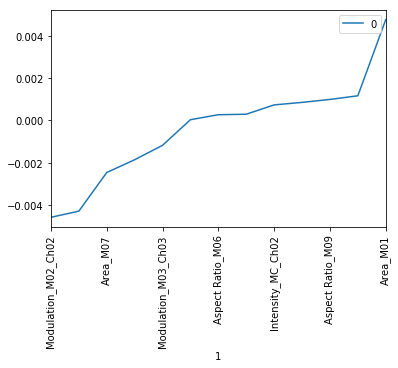

In [48]:
new_db = filtered_db
#When I was calling this function, it wasn't actually doing anything. No wonder we were getting 
#such crappy accuracies. 
new_db = new_db.sample(frac=1)

# Create the outputs Class 
Y = new_db.Class.to_numpy()
Y = Y>0 # young =1 old = 0

X = new_db.drop(['Class', 'Object Number',], axis=1)
X = X.drop([i for i in X.columns if "Bkgd Mean" in i] , axis=1)
X = X.drop([i for i in X.columns if "01" in i] , axis=1)
X = X.drop([i for i in X.columns if "09" in i] , axis=1)
X = X.drop([i for i in X.columns if "06" in i] , axis=1)
X = X.drop([i for i in X.columns if "04" in i] , axis=1)
X = X.drop([i for i in X.columns if "11" in i] , axis=1)

#This should drop nothing. 
X = X.drop(X.columns[X.isna().any()].tolist(), axis=1)

# train a classifier on all the data
clf = DecisionTreeClassifier(criterion='entropy')
sol = clf.fit(X.to_numpy(),Y.astype('int'))

# Print out the feature importances
print('Feature Importances:')
imp = sol.feature_importances_
features = {}
for i in range(0,X.shape[1]):
    print(X.columns[np.argmax(imp)] + ' ' + '{:0.3f}'.format(np.max(imp)))
    features[X.columns[np.argmax(imp)]] = np.max(imp)
    imp[np.argmax(imp)] = 0
    
# Print the crossvalidation score:
s = cross_val_score(clf, X.to_numpy(), Y.astype('int'), cv=20, n_jobs=-1)
print('Cross-validation Score: ' + str(np.mean(s)))

# Plot a graph with all the features
# sorted_d = OrderedDict(sorted(features.items(), key=lambda x: x[1]))
# names = list(sorted_d.keys())
# values = list(sorted_d.values())

df = pd.DataFrame(list(zip(values,names))).set_index(1)

df.plot.line(rot=90)

features_1 = features

In [ ]:
# with ch04 and ch11

Feature Importances:
Intensity_MC_Ch02 0.219
Modulation_M02_Ch02 0.178
Modulation_M07_Ch07 0.120
Intensity_MC_Ch07 0.119
Modulation_M03_Ch03 0.108
Area_M03 0.095
Area_M04 0.088
Area_M07 0.073
Cross-validation Score: 0.665908976299


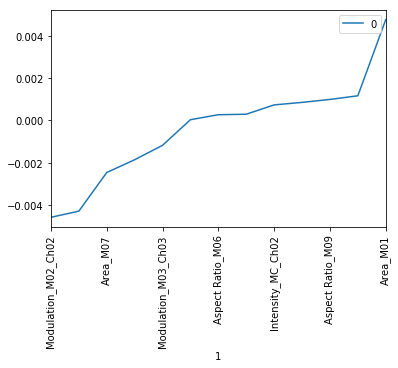

In [49]:
new_db = filtered_db
#When I was calling this function, it wasn't actually doing anything. No wonder we were getting 
#such crappy accuracies. 
new_db = new_db.sample(frac=1)

# Create the outputs Class 
Y = new_db.Class.to_numpy()
Y = Y>0 # young =1 old = 0

X = new_db.drop(['Class', 'Object Number',], axis=1)
X = X.drop([i for i in X.columns if "Bkgd Mean" in i] , axis=1)
X = X.drop([i for i in X.columns if "01" in i] , axis=1)
X = X.drop([i for i in X.columns if "09" in i] , axis=1)
X = X.drop([i for i in X.columns if "06" in i] , axis=1)
# X = X.drop([i for i in X.columns if "04" in i] , axis=1)
# X = X.drop([i for i in X.columns if "11" in i] , axis=1)

#This should drop nothing. 
X = X.drop(X.columns[X.isna().any()].tolist(), axis=1)

# train a classifier on all the data
clf = DecisionTreeClassifier(criterion='entropy')
sol = clf.fit(X.to_numpy(),Y.astype('int'))

# Print out the feature importances
print('Feature Importances:')
imp = sol.feature_importances_
features = {}
for i in range(0,X.shape[1]):
    print(X.columns[np.argmax(imp)] + ' ' + '{:0.3f}'.format(np.max(imp)))
    features[X.columns[np.argmax(imp)]] = np.max(imp)
    imp[np.argmax(imp)] = 0
    
# Print the crossvalidation score:
s = cross_val_score(clf, X.to_numpy(), Y.astype('int'), cv=20, n_jobs=-1)
print('Cross-validation Score: ' + str(np.mean(s)))

# Plot a graph with all the features
# sorted_d = OrderedDict(sorted(features.items(), key=lambda x: x[1]))
# names = list(sorted_d.keys())
# values = list(sorted_d.values())

df = pd.DataFrame(list(zip(values,names))).set_index(1)

df.plot.line(rot=90)

features_1 = features

## Fig. 2D, 2E, 3G: Rug plots

## Means, Variances and mann-whitney tests

In [42]:
points_young = analysis.points_young
points_old = analysis.points_old
hist_range = [[0,150],[0,150],[0,25],[0,2000],[0,10000],[0,100]]
# hist_range = []
dist = analysis.getTotalIntensityDistribution(plots_on=False)

labels = ['Intensity CD63', 'Intensity CD81']
KL_intensities = {}
for key in dist:
    print (key)
    for i,label in enumerate(labels):
        print('\n' + label)
        print('Mean: {0:.2f} Variance: {1:.2f}'.format(dist[key]['Mean'][i],dist[key]['Var'][i]))
    KL_intensities[key] = eval('points_' + key.lower()+ '[:,2]') + eval('+ points_' + key.lower() + '[:,3]')
    print('\nIntensity KL')
    print('Mean: {0:.2f} Variance: {1:.2f}\n'.format(np.mean(KL_intensities[key]), np.var(KL_intensities[key])))
            

        
from scipy.stats import mannwhitneyu
print ('Mann Whitney U Test Resuts:')
labels = ['Intensity CD63', 'Intensity CD81', 'Intensity KL']
for i,label in enumerate(labels):
    young = points_young[:,i]
    old = points_old[:,i]
    print(label + ': ' +  str(mannwhitneyu(young, old)[1]))


Old

Intensity CD63
Mean: 36.65 Variance: 716.47

Intensity CD81
Mean: 0.71 Variance: 0.89

Intensity KL
Mean: 32.52 Variance: 1259.44

Young

Intensity CD63
Mean: 33.06 Variance: 246.56

Intensity CD81
Mean: 0.82 Variance: 1.71

Intensity KL
Mean: 36.43 Variance: 2271.40

Mann Whitney U Test Resuts:
Intensity CD63: 9.88781882134e-05
Intensity CD81: 1.0340211297e-05
Intensity KL: 1.0683569516e-10


### Rug Plot of CD63:

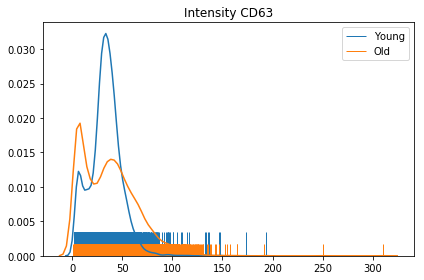

In [43]:
labels = ['Intensity CD63', 'Intensity CD81', 'Intensity KL','Intensity AltKL', 'Size CD63', 'Size CD81', 'Size KL']
i = 0
plt.figure()
sns.distplot(points_young[:,i],hist=False,rug=True,rug_kws={'height':0.1})
sns.distplot(points_old[:,i],hist=False,rug=True,rug_kws={'height':0.05})
plt.legend(['Young', 'Old'])
plt.title(labels[i])
plt.tight_layout()
plt.savefig('../generated_figures/cd63_rug_plt.eps', format='eps')
plt.show()


### Rug Plot of CD81

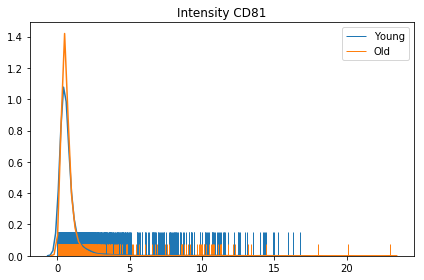

In [44]:
labels = ['Intensity CD63', 'Intensity CD81', 'Intensity KL','Intensity AltKL', 'Size CD63', 'Size CD81', 'Size KL']
i = 1
plt.figure()
sns.distplot(points_young[:,i],hist=False,rug=True,rug_kws={'height':0.1})
sns.distplot(points_old[:,i],hist=False,rug=True,rug_kws={'height':0.05})
plt.legend(['Young', 'Old'])
plt.title(labels[i])
plt.tight_layout()
p = plt.savefig('../generated_figures/cd81_rug_plt.eps', format='eps')
p = plt.show()

### Rug plot of KLotho

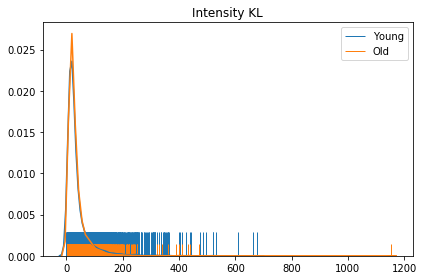

In [32]:
labels = ['Intensity CD63', 'Intensity CD81', 'Intensity KL','Intensity AltKL', 'Size CD63', 'Size CD81', 'Size KL']
i = 1
fig = plt.figure()
sns.distplot(KL_intensities['Young'],hist=False,rug=True,rug_kws={'height':0.1})
sns.distplot(KL_intensities['Old'],hist=False,rug=True,rug_kws={'height':0.05})
plt.legend(['Young', 'Old'])
plt.title('Intensity KL')
plt.tight_layout()
plt.savefig('../generated_figures/KL_rug_plt.eps', format='eps')
plt.show()

## Fig. 3I: What features predict ch11 and ch4 activation? Both are Klotho but different forms of it. 

### Ch11

Feature Importances:
[  4.97452728e-05  -8.03729092e-04   4.07946887e-04   1.19049022e-03
  -6.12028095e-04   1.92004071e-04  -2.80882893e-05  -1.32057957e-02
  -4.21305097e-03   3.53899723e-03   3.03710973e-04  -1.79316775e-04]
Modulation_M07_Ch07 0.004
Area_M06 0.001
Area_M04 0.000
Intensity_MC_Ch02 0.000
Aspect Ratio_M01 0.000
Area_M01 0.000
Area_M01 0.000
Area_M01 0.000
Area_M01 0.000
Area_M01 0.000
Area_M01 0.000
Area_M01 0.000
Cross-validation Score: -4.40300520452e-05
Cross-validation Score Var: 2.96341026266e-10


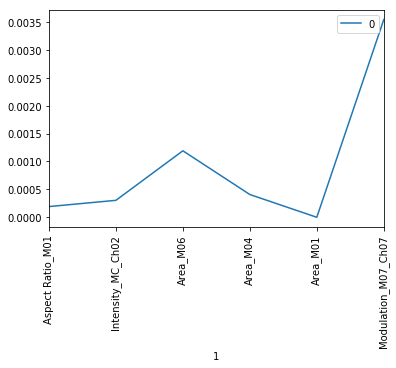

In [58]:
new_db = filtered_db
#When I was calling this function, it wasn't actually doing anything. No wonder we were getting 
#such crappy accuracies. 
new_db = new_db.sample(frac=1)

# Create the outputs Class 
Y = unfiltered_db.Intensity_MC_Ch11.to_numpy()
# Y = Y>0 # ch11> = 1, ch11< = 0
# print(np.count_nonzero(Y))
X = new_db.drop(['Class', 'Object Number',], axis=1)
X = X.drop([i for i in X.columns if "Bkgd Mean" in i] , axis=1)
X = X.drop([i for i in X.columns if "Aspect Ratio_M02" in i] , axis=1)
X = X.drop([i for i in X.columns if "09" in i] , axis=1)
# X = X.drop([i for i in X.columns if "04" in i] , axis=1)
X = X.drop([i for i in X.columns if "11" in i] , axis=1)

#This should drop nothing. 
X = X.drop(X.columns[X.isna().any()].tolist(), axis=1)

# Min Max scaler to normalize all data:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X.to_numpy())
y_scaled = Y/np.linalg.norm(Y)
# train a classifier on all the data
# clf = DecisionTreeClassifier(criterion='entropy')
reg = LinearRegression()
sol = reg.fit(x_scaled,y_scaled)

# Print out the feature importances
print('Feature Importances:')
imp = sol.coef_
features = {}
features = dict(zip(X.columns,sol.coef_))

for i in range(0,X.shape[1]):
    print(X.columns[np.argmax(imp)] + ' ' + '{:0.3f}'.format(np.max(imp)))
    features[X.columns[np.argmax(imp)]] = np.max(imp)
    imp[np.argmax(imp)] = 0
# for key,value in features.items():
#     print(key + ' ' + '{:0.3f}'.format(value))
    
    
# Print the crossvalidation score:
s = cross_val_score(reg, x_scaled, y_scaled, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
print('Cross-validation Score: ' + str(np.mean(s)))
print('Cross-validation Score Var: ' + str(np.var(s)))

# # Plot a graph with all the features
sorted_d = OrderedDict(sorted(features.items(), key=lambda x: x[1]))
names = list(sorted_d.keys())
values = list(sorted_d.values())

df = pd.DataFrame(list(zip(features.values(),features.keys()))).set_index(1)

df.plot.line(rot=90)

features_2 = features

### Ch04 + Ch11

In [37]:
new_db = filtered_db
#When I was calling this function, it wasn't actually doing anything. No wonder we were getting 
#such crappy accuracies. 
new_db = new_db.sample(frac=1)

# Create the outputs Class 
Y = unfiltered_db.Intensity_MC_KL.to_numpy()
# Y = Y>0 # ch04> = 1, ch04< = 0
X = new_db.drop(['Class', 'Object Number',], axis=1)
# X = X.drop([i for i in X.columns if "Bkgd Mean" in i] , axis=1)
# X = X.drop([i for i in X.columns if "01" in i] , axis=1)
# X = X.drop([i for i in X.columns if "09" in i] , axis=1)
# X = X.drop([i for i in X.columns if "06" in i] , axis=1)
X = X.drop([i for i in X.columns if "04" in i] , axis=1)
X = X.drop([i for i in X.columns if "11" in i] , axis=1)

#This should drop nothing. 
X = X.drop(X.columns[X.isna().any()].tolist(), axis=1)

# # train a classifier on all the data
# clf = DecisionTreeClassifier(criterion='entropy')
# sol = clf.fit(X.to_numpy(),Y.astype('int'))

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X.to_numpy())
y_scaled = Y/np.linalg.norm(Y)
# Print out the feature importances
reg = LinearRegression()
sol = reg.fit(x_scaled,y_scaled)
# Print out the feature importances
print('Feature Importances:')
imp = sol.coef_
features = dict(zip(X.columns, sol.coef_))
for key,value in features.items():
    print(key + ' ' + '{:0.3f}'.format(value))

# for i in range(0,10):
#     print(X.columns[np.argmax(imp)] + ' ' + '{:0.3f}'.format(np.max(imp)))
#     features[X.columns[np.argmax(imp)]] = np.max(imp)
#     imp[np.argmax(imp)] = 0
    
# Print the crossvalidation score:
s = cross_val_score(reg, x_scaled, y_scaled,cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
print('Cross-validation Score: ' + str(np.mean(s)))
print('Cross-validation Score Var: ' + str(np.var(s)))

# # Plot a graph with all the features
sorted_d = OrderedDict(sorted(features.items(), key=lambda x: x[1]))
names = list(sorted_d.keys())
values = list(sorted_d.values())
# plt.figure()
# plt.bar(names, values)
# plt.xticks(rotation=90)
# plt.show()
# df = pd.DataFrame(list(zip(values,names))).set_index(1)
df = pd.DataFrame.from_dict(features, orient='index', columns=['Age Prediction'])

df.plot.line(rot=90)
features_3 = features

AttributeError: 'DataFrame' object has no attribute 'Intensity_MC_KL'

## Fig. 3J: Correlation between ch7 and ch11. 

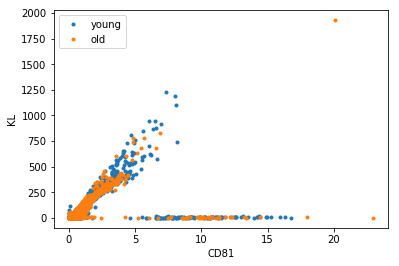

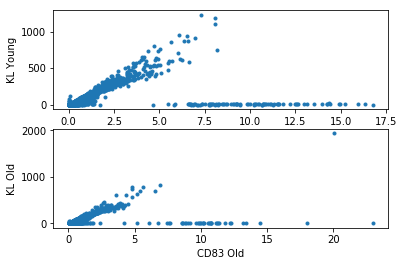

Young Pearson's correlation coefficient
[[ 1.          0.41777322]
 [ 0.41777322  1.        ]]
Old Pearson's correlation coefficient
[[ 1.          0.46332318]
 [ 0.46332318  1.        ]]


In [53]:
new_db = unfiltered_db
plt.figure()
young_ch7_intensity = new_db[(new_db.Class ==1)].Intensity_MC_Ch07
young_kl_intensity = new_db[(new_db.Class==1)].Intensity_MC_KL
old_ch7_intensity = new_db[(new_db.Class ==0)].Intensity_MC_Ch07
old_kl_intensity = new_db[(new_db.Class==0)].Intensity_MC_KL

plt.plot(young_ch7_intensity, young_kl_intensity, '.')
plt.plot(old_ch7_intensity, old_kl_intensity,'.')
plt.legend(['young', 'old'])
plt.xlabel('CD81')
plt.ylabel('KL')
plt.show()
# thought I should sperate these plots out. 
plt.subplot(2,1,1)
plt.plot(young_ch7_intensity, young_kl_intensity, '.')
plt.xlabel('CD81 Young')
plt.ylabel('KL Young')
plt.subplot(2,1,2)
plt.plot(old_ch7_intensity, old_kl_intensity,'.')
plt.xlabel('CD83 Old')
plt.ylabel('KL Old')
# plt.legend(['young', 'old'])
plt.show()
# Pearson's correlation coefficient
print("Young Pearson's correlation coefficient")
print(np.corrcoef(young_ch7_intensity, young_kl_intensity))
print("Old Pearson's correlation coefficient")
print(np.corrcoef(old_ch7_intensity, old_kl_intensity))


### Fig. 3K: Heat map for classifiers

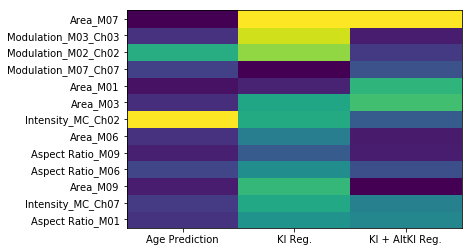

,Age Prediction,Kl Reg.,Kl + AltKl Reg.
Features,,,
Aspect Ratio_M01,0.148106,0.511822,0.461108
Intensity_MC_Ch07,0.172461,0.601077,0.430240
Area_M09,0.078964,0.665185,0.000000
Aspect Ratio_M06,0.209787,0.490464,0.239868
Aspect Ratio_M09,0.087667,0.282958,0.078680
Area_M06,0.143506,0.421327,0.073246
Intensity_MC_Ch02,1.000000,0.609019,0.287547
Area_M03,0.129530,0.590344,0.698932
Area_M01,0.043136,0.095645,0.650377


In [13]:
heat_map = pd.DataFrame.from_dict(features_1, orient='index', columns=['Age Prediction'])
heat_map.index.name = 'Features'
heat_map['Kl Reg.'] = heat_map.index.map(features_2)
heat_map['Kl + AltKl Reg.'] = heat_map.index.map(features_3)

heat_map = heat_map.apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)

plt.figure()
plt.pcolor(heat_map)
plt.yticks(np.arange(0.5, len(heat_map.index), 1), heat_map.index)
plt.xticks(np.arange(0.5, len(heat_map.columns), 1), heat_map.columns)
plt.savefig('../generated_figures/heat_map.eps',format='eps')
plt.show()
heat_map